<a href="https://colab.research.google.com/github/stxupengyu/sklearn-regression-algorithm/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.utils import shuffle
plt.style.use('fivethirtyeight')
#读取数据 
choose=2#选择预测第几个结果
train_num=400#训练集数量
def load_data(choose,train_num):
  #读取对应数据集
  data=pd.read_excel('数据.xls') 
  data=shuffle(data,random_state=0)#打乱
  x=data.iloc[:,:23]
  y=data.iloc[:,23+choose]
  print('数据集长度：',len(x))
  x_train,y_train,x_test,y_test=x.iloc[:train_num,:],y.iloc[:train_num],x.iloc[:,:],y.iloc[:]
  print('数据集shape：',x_train.shape,y_train.shape,x_test.shape,y_test.shape)
  return x_train.values,y_train.values,x_test.values,y_test.values
def mape(y_true, y_pred):
  #评价指标
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100
def easy_result(y_train,y_train_predict,train_index):
  #画图进行展示
  plt.figure(figsize=(10,5))
  plt.plot(y_train)
  plt.plot(y_train_predict)
  plt.legend(('real', 'predict'),fontsize='15')
  plt.title("%s Data"%train_index,fontsize='20') #添加标题
  plt.show()
  print('\n')
  plot_begin,plot_end=min(min(y_train),min(y_train_predict)),max(max(y_train),max(y_train_predict))
  plot_x=np.arange(plot_begin,plot_end,1)
  plt.figure(figsize=(5,5))
  plt.plot(plot_x,plot_x)
  plt.plot(y_train,y_train_predict,'o')
  plt.title("%s Data"%train_index,fontsize='20') #添加标题
  plt.show()
  #输出结果
  print('%s上的MAE/MSE/MAPE/涨跌准确率'%train_index)
  print(mean_absolute_error(y_train_predict, y_train))
  print(mean_squared_error(y_train_predict, y_train) )
  print(mape(y_train_predict, y_train) )
def model_result(model):
  #输出当前模型下的结果
  model = model.fit(x_train, y_train) 
  y_train_predict=model.predict(x_train)
  easy_result(y_train,y_train_predict,'Train')
  y_test_predict=model.predict(x_test)
  easy_result(y_test,y_test_predict,'Test')
#读取数据
x_train,y_train,x_test,y_test=load_data(choose,train_num)

数据集长度： 552
数据集shape： (400, 23) (400,) (552, 23) (552,)


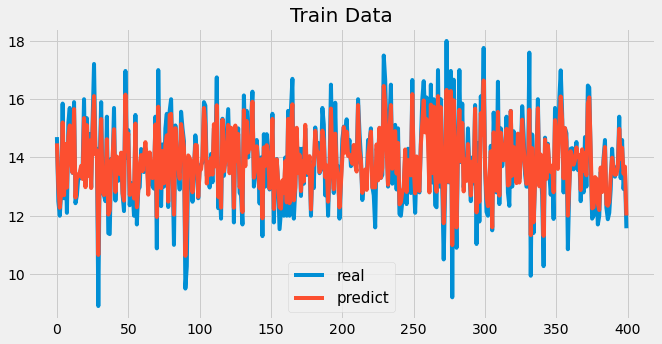

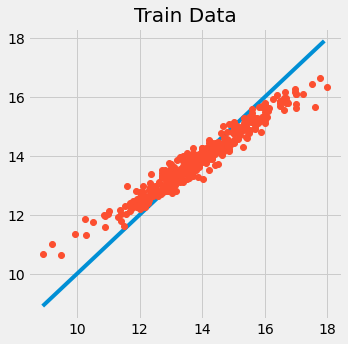

Train上的MAE/MSE/MAPE/涨跌准确率
0.3744651000000006
0.24609112862783392
2.729947081218389


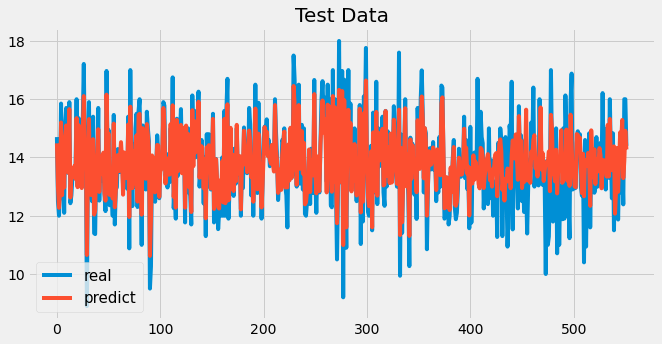

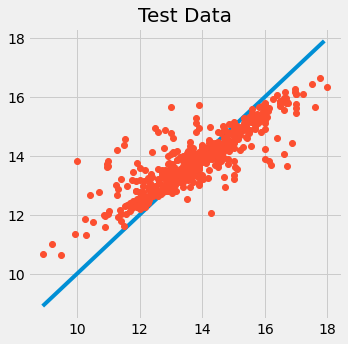

Test上的MAE/MSE/MAPE/涨跌准确率
0.5453694263285029
0.6371374509733297
3.958215442247827


In [90]:
# 建立随机森林模型 预测
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model_result(model)

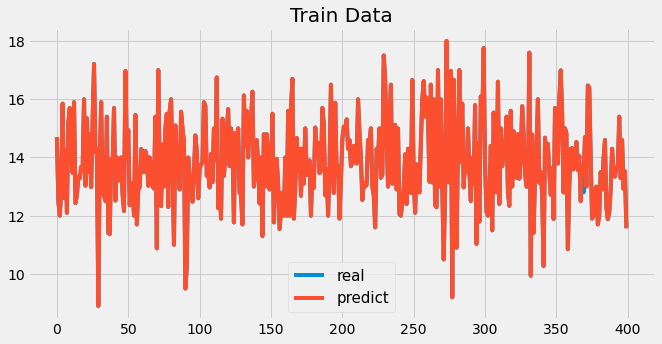

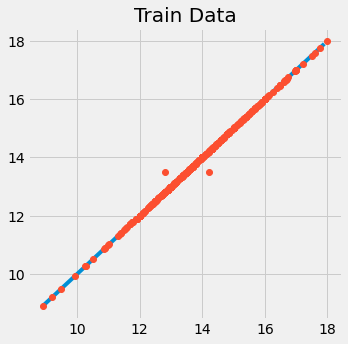

Train上的MAE/MSE/MAPE/涨跌准确率
0.0035499999999999998
0.0025205
0.026276831976313836


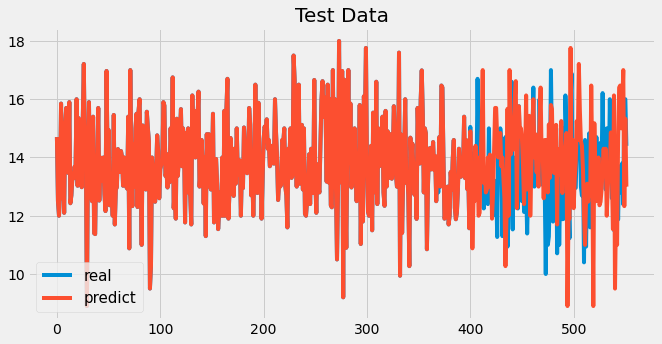

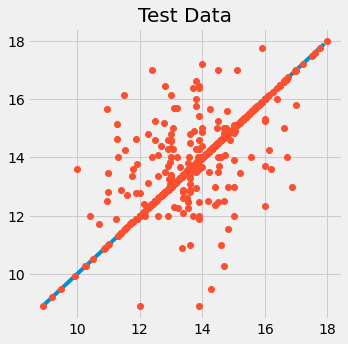

Test上的MAE/MSE/MAPE/涨跌准确率
0.42429347826086955
1.0191460144927535
3.1451430954808095


In [91]:
#决策树
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model_result(model)

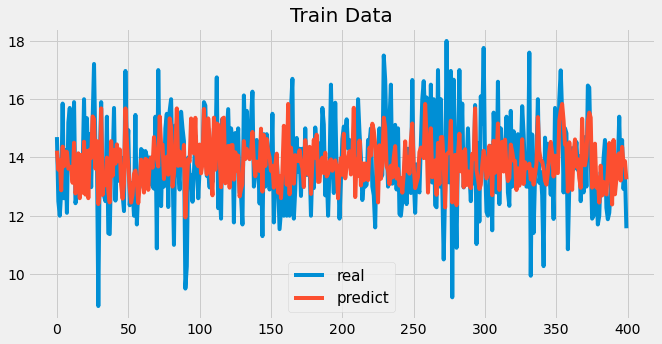

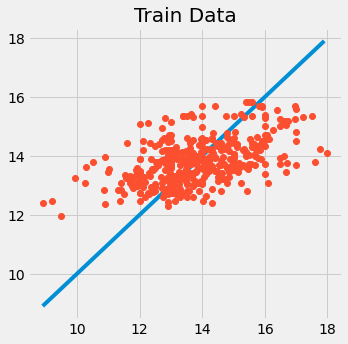

Train上的MAE/MSE/MAPE/涨跌准确率
1.0120892857142858
1.6344474821428572
7.316859220431243


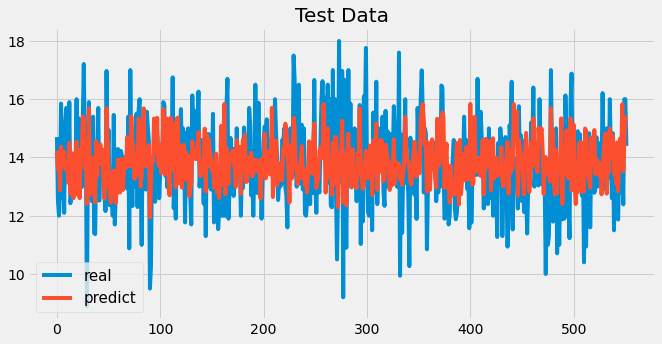

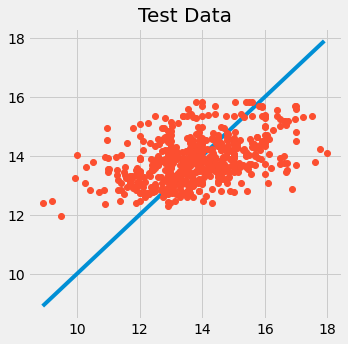

Test上的MAE/MSE/MAPE/涨跌准确率
1.0402807971014492
1.7466335283569951
7.498893182692792


In [92]:
#knn
from sklearn.neighbors import KNeighborsRegressor
model= KNeighborsRegressor(n_neighbors=7)
model_result(model)

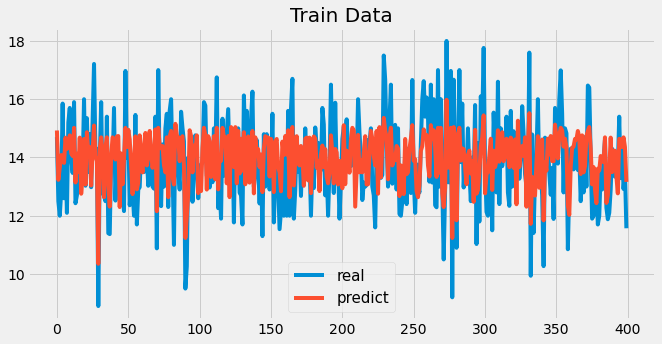

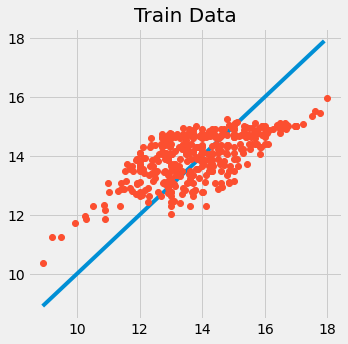

Train上的MAE/MSE/MAPE/涨跌准确率
0.95299683213191
1.2581185863182645
6.826796609373713


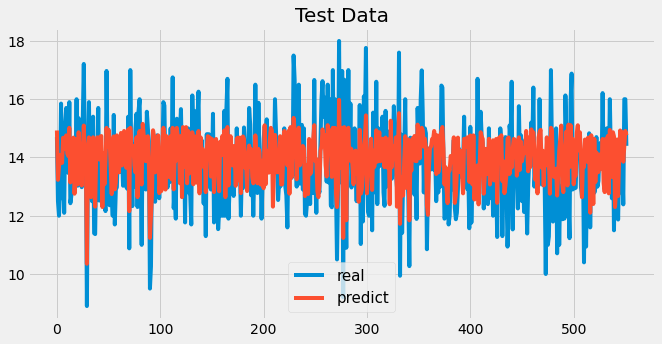

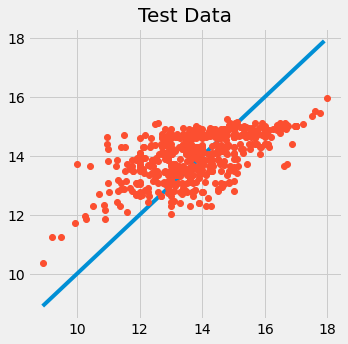

Test上的MAE/MSE/MAPE/涨跌准确率
0.9841051183231435
1.4511799854210818
7.04333054078224


In [93]:
#adaboost
from sklearn.ensemble import AdaBoostRegressor
model= AdaBoostRegressor(n_estimators=100, random_state=0)
model_result(model)

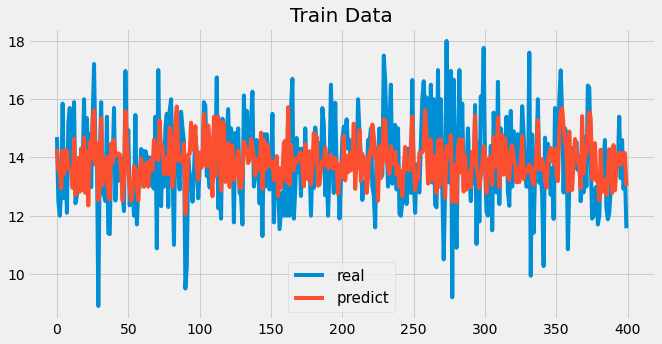

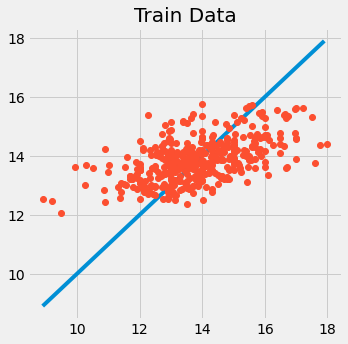

Train上的MAE/MSE/MAPE/涨跌准确率
0.994221785714286
1.57195596619898
7.171540185401333


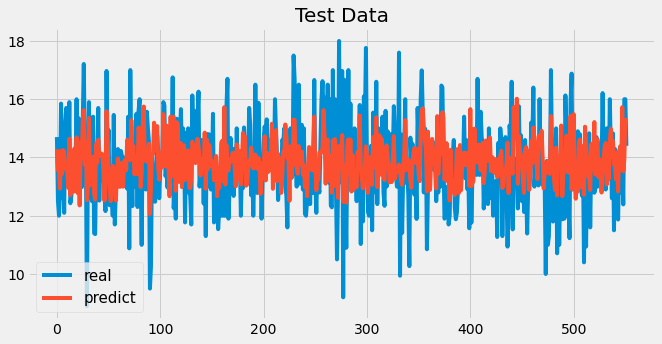

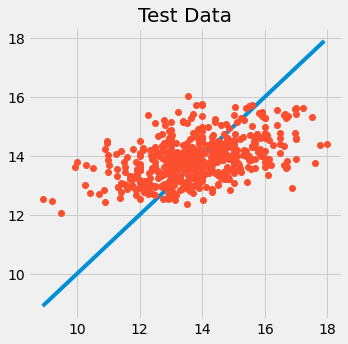

Test上的MAE/MSE/MAPE/涨跌准确率
1.0209547101449277
1.675735755859953
7.3507869590456885


In [94]:
from sklearn.ensemble import BaggingRegressor
model= BaggingRegressor(base_estimator=KNeighborsRegressor(n_neighbors=7),n_estimators=10, random_state=0)
model_result(model)

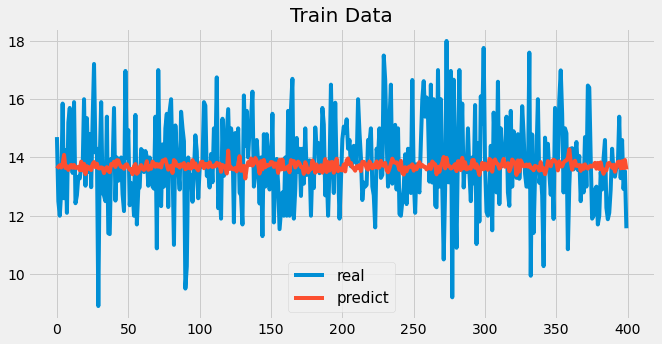

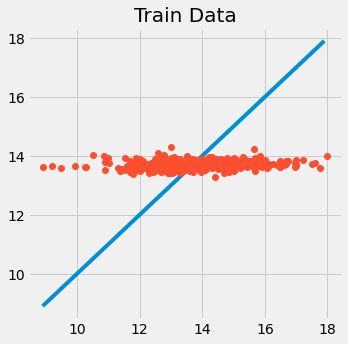

Train上的MAE/MSE/MAPE/涨跌准确率
1.149257208477208
2.1623283198286063
8.380960978660315


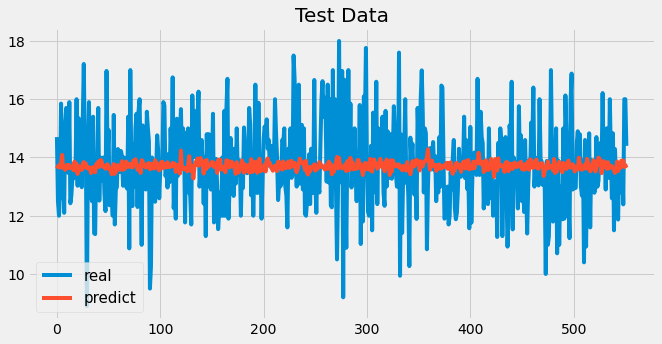

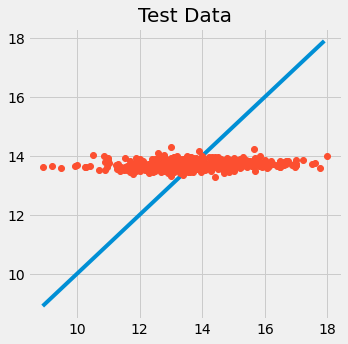

Test上的MAE/MSE/MAPE/涨跌准确率
1.1212238213996482
2.0786461946018737
8.178454612622978


In [95]:
#支持向量机
from sklearn.svm import SVR
model=SVR(kernel='rbf')
model_result(model)

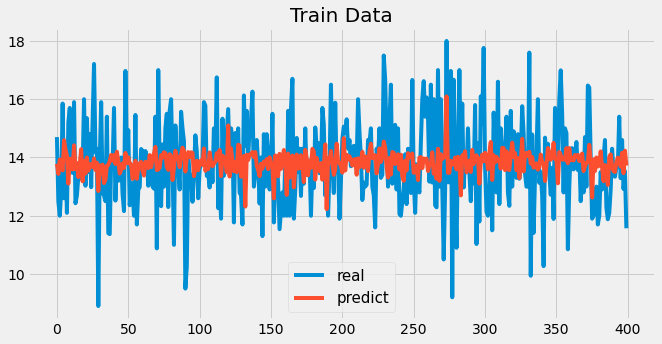

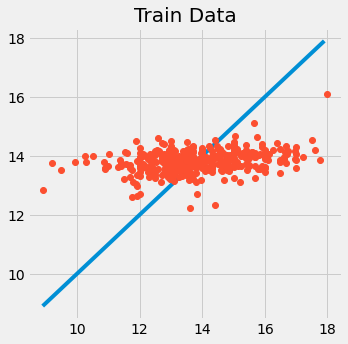

Train上的MAE/MSE/MAPE/涨跌准确率
1.1135377869415053
1.9977048043055408
8.048489774324242


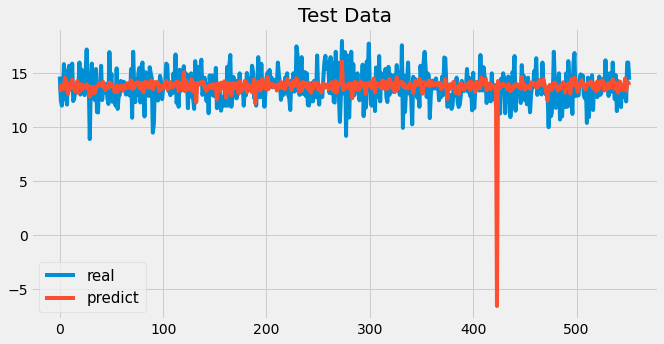

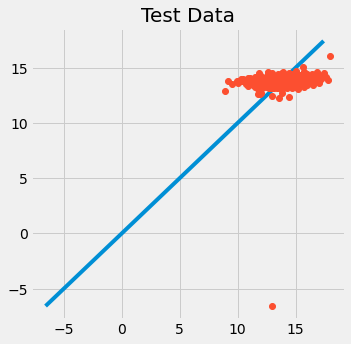

Test上的MAE/MSE/MAPE/涨跌准确率
1.1237449849748586
2.617298039150431
8.405506582939443


In [96]:
#弹性网回归
from sklearn.linear_model import ElasticNet
model=ElasticNet(alpha=.1, l1_ratio=.9, random_state=3)
model_result(model)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


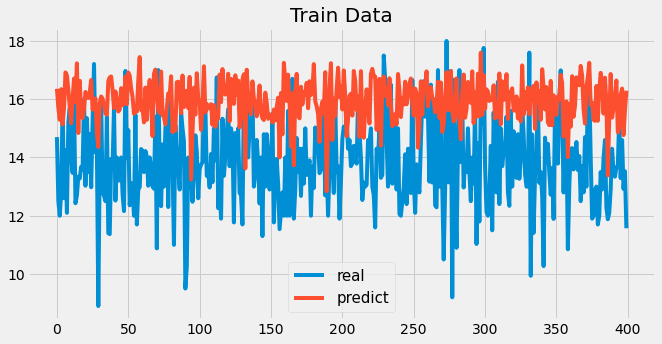

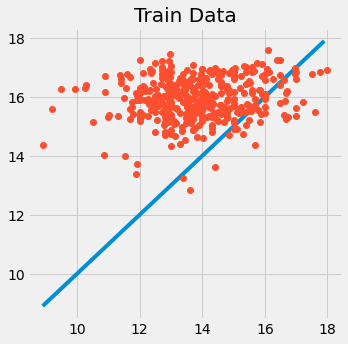

Train上的MAE/MSE/MAPE/涨跌准确率
2.2239974093666106
6.835064871945693
13.86223851915628


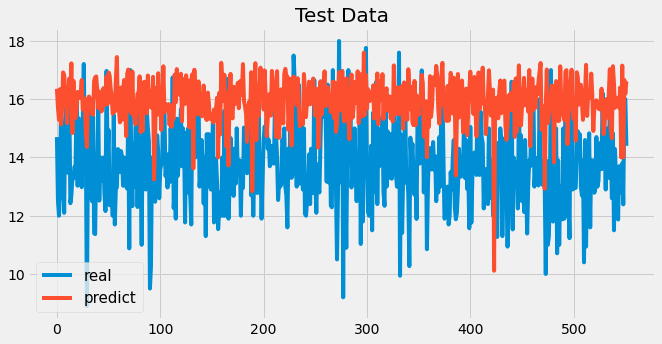

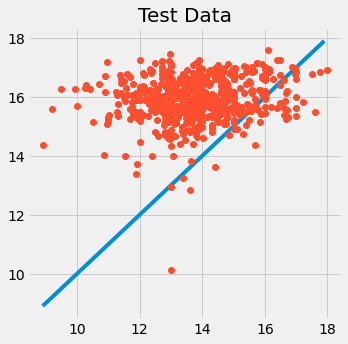

Test上的MAE/MSE/MAPE/涨跌准确率
2.2707415157503825
7.012787438520086
14.174876568094419


In [97]:
#线性支持向量机
from sklearn.svm import LinearSVR  
model = LinearSVR() 
model_result(model)

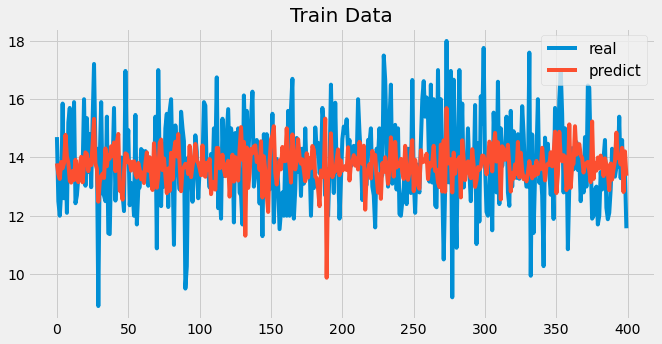

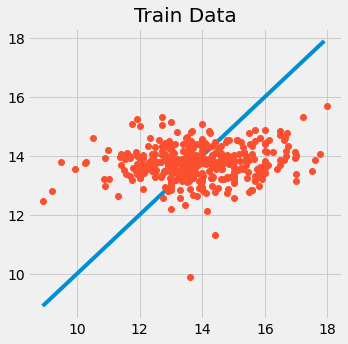

Train上的MAE/MSE/MAPE/涨跌准确率
1.2313679923122731
2.3481543192248195
8.997140978644964


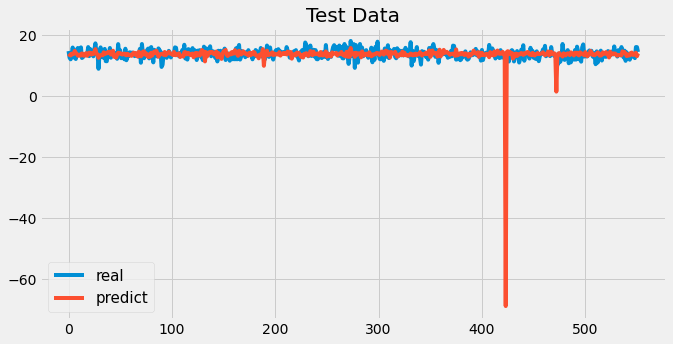

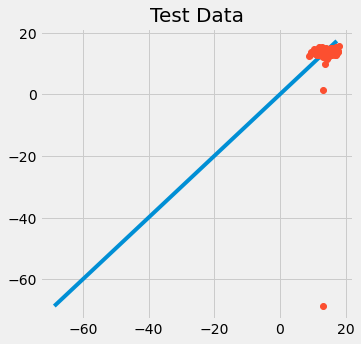

Test上的MAE/MSE/MAPE/涨跌准确率
1.3676082764139426
14.60785424983906
10.431180898527018


In [98]:
#神经网络
from sklearn.neural_network import MLPRegressor
model= MLPRegressor()
model_result(model)

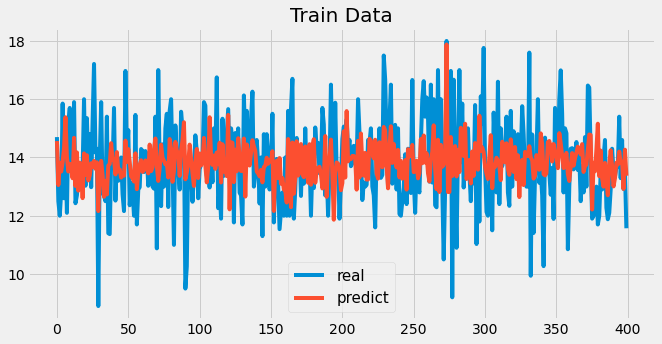

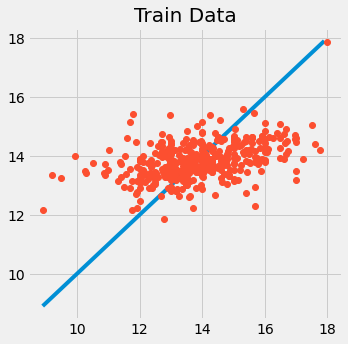

Train上的MAE/MSE/MAPE/涨跌准确率
1.0454418751661532
1.7991312978067975
7.5556786782079985


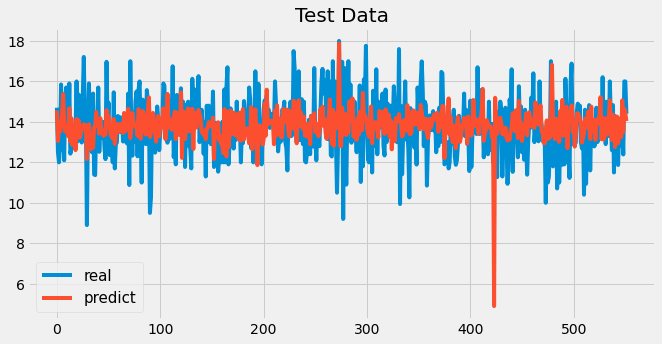

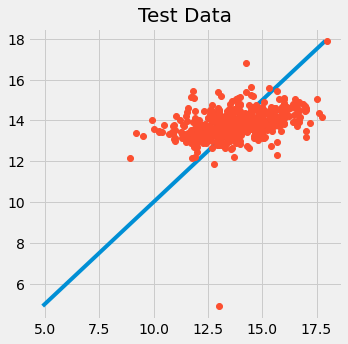

Test上的MAE/MSE/MAPE/涨跌准确率
1.0556109143045205
1.8937366243126688
7.807956496909485


In [99]:
#线性回归模型
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model_result(model)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


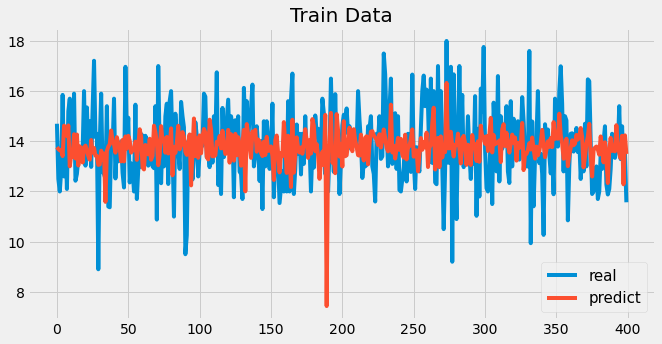

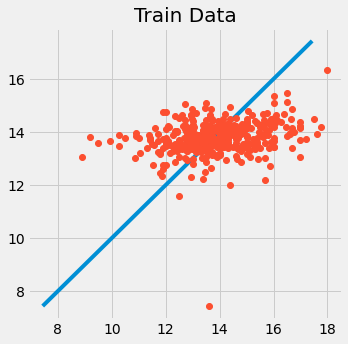

Train上的MAE/MSE/MAPE/涨跌准确率
1.140882124770433
2.1292065004587966
8.371117082799183


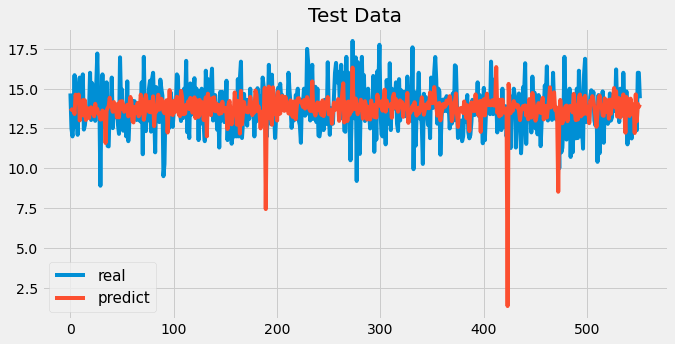

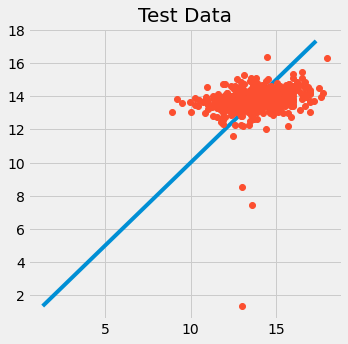

Test上的MAE/MSE/MAPE/涨跌准确率
1.1368110164595762
2.2900898234080542
9.770747629484767


In [100]:
#huber回归
from sklearn.linear_model import HuberRegressor
model= HuberRegressor()
model_result(model)